<a href="https://colab.research.google.com/github/ShayHav/MachineLearning/blob/main/Execise%202%20naive%20bais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes

## Write your id numbers and names here


1.   Shay Havivyan
2.   Shahar Lankry


## 1. Classifying Digits
In this part we will test digits classification on the MNIST dataset, using Bernoulli Naive Bayes (a generative model), in contrast to the Multivariate Logistic Regression (a discriminative model) we saw.

The MNIST dataset contains 28x28 grayscale images of handwritten digits between 0 and 9 (10 classes). For mathmatical analysis clarity, and for matching expected API, each image faltten to create a 1D array with 784 elements.

### Loading the MNIST dataset
Load the MNIST data set. The digits dataset is one of datasets scikit-learn comes with that do not require the downloading of any file from some external website. Use 
```
mnist = sklearn.datasets.fetch_mldata('MNIST original')
```
to fetch the original data. You may set the `data_home` to where you wish to download your data for caching. Each image is already transformed into a 1D integer array $x\in [0,255]^{784}$, and the corresponding label is an integer $y\in [0,9]$.

Plot a single sample of each digit as the original image, so you get a feeling how the data looks like.

Finally, divide your data into train and test sets, using 1/7 of the data for testing.

---
**Note 1:** Using `digits = sklearn.datasets.load_digits()` will only fetch a very small sample of the original set, with images resized to 8x8. This preprocessing of the data reduces dimensionality and gives invariance to small distortions - however, we will use the original data in this exercise. Feel free to test the proformance of the algorithms below on the preprocessed data as well.

**Note 2:**
Since ML-Data is deprecated, you may wish to use something like this:
>```
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)
```

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)


11490434/11490434 [==============================] - 1s 0us/step


### Bernoulli Naive Bayes
If we know how the digits are generated, then we know how to classify them (simply choose the digit class which will maximize the posterior probability) --- but which model should we use for describing the digits generation?

In this part we will try a very simplified model of digits creation (which is obviously not the same as the "real" model), using a Naive Bayes over an underlying Bernoulli distribution --- that is, we will assume that given a digit class, the pixels of the images are the result of independent coin flips, each with its own "head" probability.

Note that since we assume each pixl is either 0 (black) or 1 (white), we will need to adjust (preprocess) our data accrodingly (see below).

So, the model is stated as follows:
$$
\begin{align}
\text{Domain} && x \in \{0,1\}^{784} \\
\text{Prior} && \pi_j = \Pr(y=j) \\
\text{Likelihood} && P_j(x) = \Pr(x | y=j) \\
\end{align}
$$

Where for each $i\in 0\ldots 784$ it holds that
$$
P_{ji}(x_i) = \Pr(x_i | y=j) =
\begin{cases}
p_{ji} & \text{if } x_i=1 \\
1-p_{ji} & \text{if } x_i=0 \\
\end{cases}
$$


#### Question 1
Write the classification rule based on this Naive Bayes model. 
How would you esitmate each of the parameters of the model based on the trainning data? 
Describe in text (preferably math notationns) the classification rule, and explain.

**Note:** Think of edge cases which may effect your estimator in an undesired way.

#### Answer 1
As seen at class the Naive Bayes optimal classifier is:
$h_{bayes}(x)= argmax_{y ∈ [0,9]}𝐏(Y = y| X = x)$

which is equivalent to the following using the bayes formula 
\begin{align}
h_{bayes}(x)= arg max_{y ∈ [0,9]} \frac{𝐏\,(Y = y)̇\,𝐏\,(X = x \mid Y = y)}{𝑷\,(X = x)}
\end{align}

since the denominator is constant because we want to maximize y and since we know that the X's are the pixel of a image and are a result of independant of flipping a coin the formula is the following

\begin{align}
h_{bayes}(x)= arg max_{y ∈ [0,9]} 𝑷(Y = y)∏_{i = 1}^{784}P(X = x_i | Y= y)
\end{align}

The edge case are when there exist an i such that $P(X = x_i | Y = y) = 0$ and in this case the product will result to 0. (as we talk about in class)

#### Question 2
Run a Naive Bayes classifier on the training data and apply predictions on the test data. Use the [sklearn.naive_bayes.BernoulliNB](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) implementation (see the [source code for sklearn.naive_bayes](https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/naive_bayes.py) for details).

Remember we need to preprocess the data in this case such that each pixel would become either black (0) or white (1). For this, use the `binarize` parameter of the implementation. Set this value to $0$ (this is the default), which in this case would mean every pixel with non-zero value will be set to 1.

1. Plot the mean image of each class (estimated $\hat{p}_{ji}$) and generate one sample of each class (remember, you can do this since this is a generative model). You will need to access the `feature_log_prob_` attribute of the trained model.

2. Plot the confusion matrix of your classifier, as claculated on the test data (it is recommended to use [sklearn.metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)). Calculate the total accuracy (fraction of correctly classified images), and summarize the results in your own words.

3. Think of a way you can find the optimal threshold of the binarization part. **There is no need to actually perform this task --- just describe what you would have done.**


#### Answer 2
according to the confusion matrix where each cell on the main diagonal is the number of correct samples predicted to it's digit. and from calculating the accuracy(summing the main diagonal and dividing the number of samples) we got high accuracy of 84%.

#### Answer 3
To find the optimal threshold of the binarization we would have calculated the accuracy of the prediction using different threshold in range of 0- 255 and choosing the argmax.

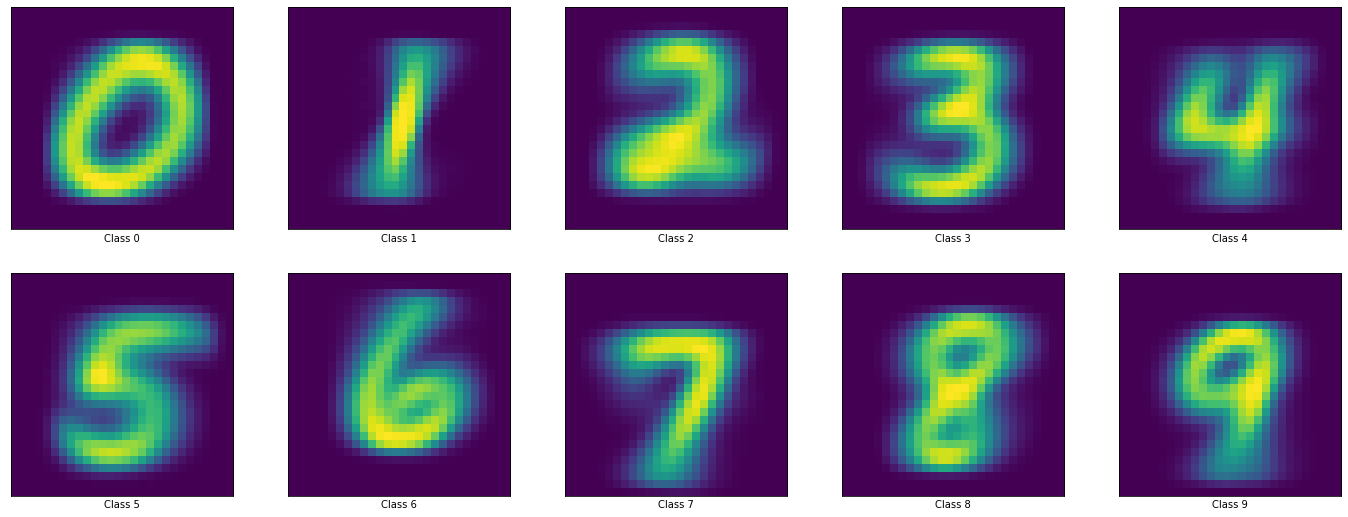

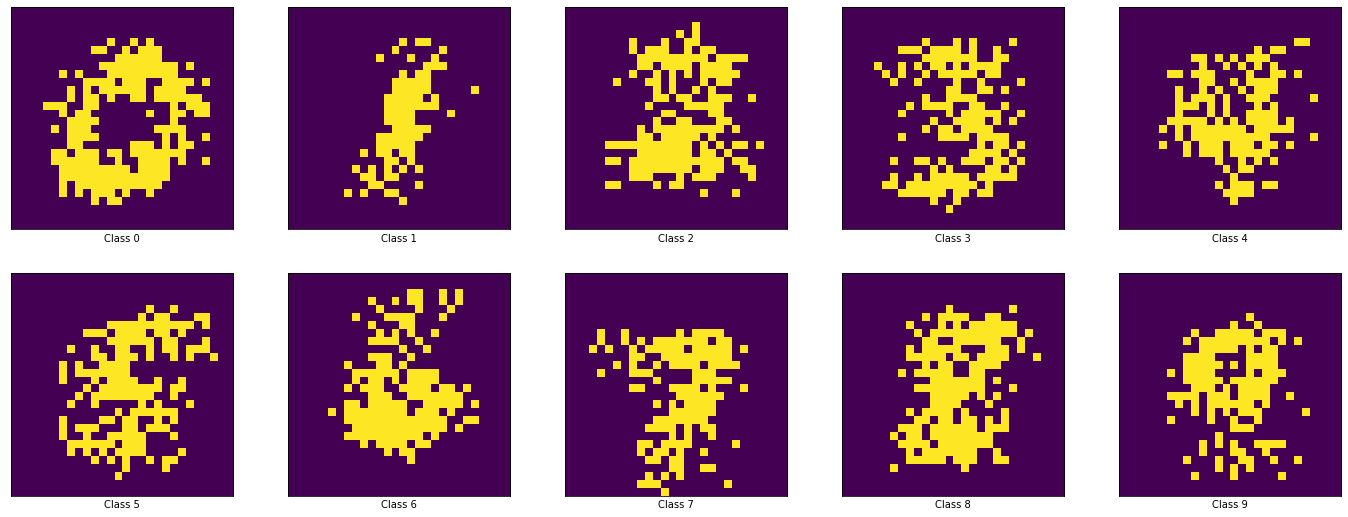

the accuracy of the Naive Bayes is 0.8413


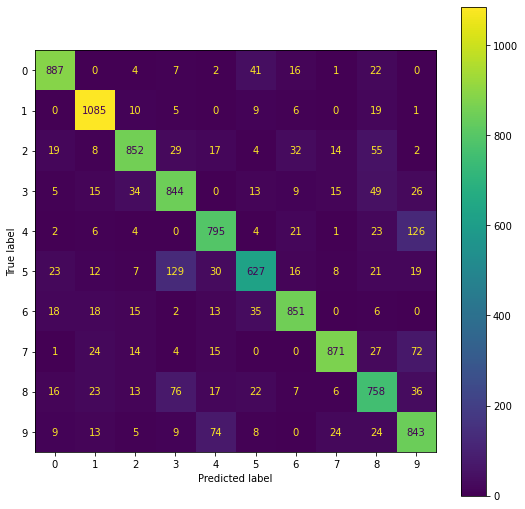

In [ ]:
from keras.utils import image_dataset
from sklearn.naive_bayes import BernoulliNB, binarize
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from numpy.random import rand

bernoulli = BernoulliNB(binarize=0.0)
bernoulli.fit(x_train, y_train)
predicted = bernoulli.predict(x_test)

# plotting the mean image of each class
plt.subplots(2, 5, figsize=(24,9))
log_prob = bernoulli.feature_log_prob_
for i in range(10):
  fig = plt.subplot(2,5, i+ 1)
  mean_image = np.exp(log_prob[i]).reshape(28, 28)
  fig.imshow(mean_image, interpolation='nearest')
  fig.set_xticks(())
  fig.set_yticks(())
  fig.set_xlabel('Class %i' % i)
plt.show()

# generate sample for each class
plt.subplots(2, 5, figsize=(24,9))
log_prob = bernoulli.feature_log_prob_
for i in range(10):
  fig = plt.subplot(2,5, i+1)
  image = rand(784)
  exp_prob = np.exp(log_prob[i])
  image = np.where(image < exp_prob, 1, 0)
  image = image.reshape(28,28)
  fig.imshow(image)
  fig.set_xticks(())
  fig.set_yticks(())
  fig.set_xlabel('Class %i' % i)
plt.show()


# plotting the confusion matrix
c_matrix = confusion_matrix(y_test, predicted)
conf_matrix_display = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
fig, ax = plt.subplots(figsize=(9, 9))
conf_matrix_display.plot(ax=ax)

# calculating the accurancy of the model
accuracy = np.sum(np.diagonal(c_matrix)) / len(predicted)
print(f'the accuracy of the Naive Bayes is {accuracy}')

## 2. Classifing Text Documents using Multinomial Naive Bayes
In this exercise you will classify the "20 newsgroups" data set using your own naive bayes classifier and compare to the scikit learn built in version.

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon messages posted before and after a specific date.

### You task
Implement the barebone class provided: `NaiveBayes(BaseEstimator, ClassifierMixin)` and implement its `fit`, `predict` and `predict_proba` methods.

Then follow next anlysis guidlinnes using the implemented class for train and test classifier:
* Load the **train** data using `from sklearn.datasets import fetch_20newsgroups`. remove headers, footers and quotes (see documentation)
* Use `sklearn.feature_extraction.text import CountVectorizer` to count words (stop_words='english')
* use `sklearn.pipeline.make_pipeline` to chain the vectroizer and model.
* note: limit the vocuabolary size if you suffer memory issues
* compare the accuracy over the **test** data. You can use `accuracy_score, classification_report`
* compare to the built in `sklearn.naive_bayes.MultinomialNB`
* compare to `TfidfVectorizer` preprocessing (you can use the built in model for doing the analysis)
* plot the learning curve - is the model in the bias or variance regime (you can use the built in model for doing the analysis)
* optimize performance in respect to vectorizer hyper parameters (e.g. max_features, max_df etc.).


In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class NaiveBayes(BaseEstimator, ClassifierMixin):
  
  _p_of_c = dict()
  _p_of_x_given_c = dict()
  

  def fit(self, x, y):
    classes, counts = np.unique(y,return_counts=True)
    features_in_class = dict()
    self._classes = classes
    self._num_of_features = x.shape[1]
    
    for i, c in enumerate(classes):
      # calculating p(c) for each class
      self._p_of_c[c] = np.log(counts[i] / len(y))
      features_in_class[c] = dict()

      # calculating count(x_i,c)
      for feature in range(len(x[0])):
        n_of_occurance = 0
        for sample in range(len(x)):
          if y[sample] == c:
            n_of_occurance += x[sample][feature]
        features_in_class[c][feature] = n_of_occurance
      n_of_features_in_c = np.sum(np.fromiter(features_in_class[c].values(), dtype=np.uint32))

      # calculating p(x_i| c) => number of occurances of x_i in c, 
      # divided by total number of occurances of words in c
      for feature, count in features_in_class[c].items():
        prob = np.float64(count+1) / np.float64(n_of_features_in_c + x.shape[1])
        if self._p_of_x_given_c.get(feature) is None:
          self._p_of_x_given_c[feature] = dict()
        self._p_of_x_given_c[feature][c] = np.log(prob)
    return None

  # returns the maximum p(c | x_i) probability for each sample in x 
  def predict_log_proba(self, x):
    ans = []
    for x_i in x:
      classes_prob = []
      for c in self._classes:
        c_nb = self._p_of_c[c]
        for feature in range(self._num_of_features):
            c_nb += (self._p_of_x_given_c[feature][c] * x_i[feature])
        classes_prob.append(c_nb)
      max_c_nb_prob = np.max(classes_prob)
      ans.append(max_c_nb_prob)      
    return ans

  # classify each sample to its predicted class, based on the maximum probability 
  # p( c | x_i)
  # the probability is calculted with the formula:
  # log(p(c | x_i)) = log(p(c)) + sum(log(p(x_i | c) * x_i))
  def predict(self, x):
    ans = []
    for x_i in x:
      classes_prob = []
      for c in self._classes:
        c_nb = self._p_of_c[c]
        for feature in range(self._num_of_features):
            c_nb += (self._p_of_x_given_c[feature][c] * x_i[feature])
        classes_prob.append(c_nb)
      argmax_c_nb = np.argmax(classes_prob)
      max_class = self._classes[argmax_c_nb]
      ans.append(max_class)      
    return ans

In [ ]:
from importlib.resources import contents
from os import pipe
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB

In [ ]:


# fetching the samples
trains = fetch_20newsgroups(subset='train',remove=(' headers','footers', 'quotes'))
test = fetch_20newsgroups(subset='test',remove=(' headers','footers', 'quotes'))

# testing our model using Count Vectorizer
train_vectorizer = CountVectorizer(stop_words='english', max_features=1000)
words = train_vectorizer.fit_transform(trains.data).toarray()
ourNB = NaiveBayes()
ourNB.fit(words, trains.target)
test_vectorizer = CountVectorizer(vocabulary = train_vectorizer.vocabulary_)
predicted = ourNB.predict(test_vectorizer.fit_transform(test.data).toarray())
accuracy = accuracy_score(list(test.target), predicted)
print(f'accuracy of our implementation of multinomial Naive Bayes with Count Vectorizer is: {accuracy}')

# comparing to sklearn model
nb = MultinomialNB()
nb.fit(words, trains.target)
thier_prediction = nb.predict(test_vectorizer.fit_transform(test.data).toarray())
accuracy = accuracy_score(list(test.target), thier_prediction)
print(f'accuracy of sklearn implementation of multinomial Naive Bayes with Count Vectorizer is: {accuracy}')

# testing our model using TF-IDF Vectorizer
train_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
words = train_vectorizer.fit_transform(trains.data).toarray()
ourNB = NaiveBayes()
ourNB.fit(words, trains.target)
test_vectorizer = TfidfVectorizer(vocabulary = train_vectorizer.vocabulary_)
predicted = ourNB.predict(test_vectorizer.fit_transform(test.data).toarray())
accuracy = accuracy_score(list(test.target), predicted)
print(f'accuracy of our implementation of multinomial Naive Bayes with TF-IDF Vectorizer is: {accuracy}')

# comparing to sklearn model
nb = MultinomialNB()
nb.fit(words, trains.target)
thier_prediction = nb.predict(test_vectorizer.fit_transform(test.data).toarray())
accuracy = accuracy_score(list(test.target), thier_prediction)
print(f'accuracy of sklearn implementation of multinomial with TF-IDF Vectorizer is: {accuracy}')

accuracy of our implementation of multinomial Naive Bayes with Count Vectorizer is: 0.5420870950610728
accuracy of sklearn implementation of multinomial Naive Bayes with Count Vectorizer is: 0.5420870950610728
accuracy of our implementation of multinomial Naive Bayes with TF-IDF Vectorizer is: 0.6058151885289432
accuracy of sklearn implementation of multinomial with TF-IDF Vectorizer is: 0.604089219330855


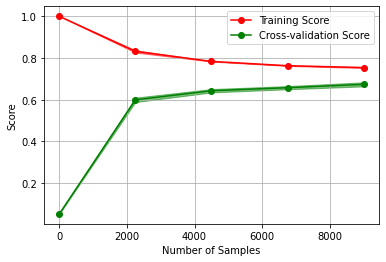

In [ ]:
from sklearn.model_selection import learning_curve

# creating range of samples
num_of_samples = np.linspace(1, 9000, 5, dtype=np.uint32)

# applying learning curve
train_sizes, train_scores, test_scores = learning_curve(MultinomialNB(), words, trains.target, train_sizes=num_of_samples, scoring='accuracy')

# Each column represents specific num_of_samples, we calculate mean, std, on the colums
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()

# we plot the data around the calculated mean, in the range of the std
plt.fill_between(train_sizes, train_scores_mean- train_scores_std, train_scores_mean + train_scores_std, alpha=0.5, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.5, color='g')

plt.plot(train_sizes, train_scores_mean, "-o", color="r", label="Training Score")
plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation Score")

plt.legend(loc='best')
plt.xlabel("Number of Samples")
plt.ylabel("Score")

plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
import pandas as pd
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

# we want to optimize the accuracy based on vectorizer parameters
parameters = {
    'vectorizer__max_features': (500,1000,1500),
    'vectorizer__max_df': (0.5, 0.75, 1)
}

score = make_scorer(accuracy_score)

grid_obj = GridSearchCV(
    pipeline,
    parameters,
    scoring = score,
    return_train_score=True
)

grid_obj.fit(trains.data, trains.target)
print(f'The best combination of the parameters max_df and max_features is:{grid_obj.best_params_}')

scores = pd.DataFrame(grid_obj.cv_results_)
maximum_score = max(scores['mean_test_score'])
print(f'The maximum mean test score is:{maximum_score}')



The best combination of the parameters max_df and max_features is:{'vectorizer__max_df': 0.5, 'vectorizer__max_features': 1500}
The maximum mean test score is:0.6929472820950414


In [ ]:
clf = grid_obj.best_estimator_
clf.fit(trains.data, trains.target)
print(f'The accuracy score of the best estimator in the grid_obj: {accuracy_score(test.target, clf.predict(test.data))}')

The accuracy score of the best estimator in the grid_obj: 0.633563462559745


**Answer:**

We performed GridSearchCV, trying to find the best combination of vectorizer hyper prarameters to optimize the poor accuracy from the previous section. 
As we see, there is a significant improvement in the accuracy, from 54% or 60% to 63%. 
We can refine the range of the given parameters even more to get better optimizations. 

#### Model interpretability
Find the most important features for a **specific** decision of a NB classifier.
Because the model has learned the prior $p(x_i|c)$ during the training, the contribution of an individual feature value can be easily measured by the posterior, $p(c|x_i)=p(c)p(x_i|c)/p(x_i)$
Implement a function which gets a scikit-learn NB model as input and returns $P(c|x_i)$:

`def calc_p_c_given_xi(model)`

Hint: Use the following model properties:

* `model.class_log_prior_`
* `model.feature_log_prob_`

Note: remember these are logs and you need to use np.exp and normalize to get $P(c|x_i)$ 
Another hint: use numpy built-in broadcasting property.

* Use the interpretation to examine errors of the classifier where $\hat{c}\ne c$. Which top words support the correct class and which support the wrong class? You can use the `print_txt` below to color words.

In [ ]:
import string
def print_txt(txt, hot, cold):
  """
  print the text, coloring hot and cold words with colors
  """
  cold_color='\x1b[41;37m{}\x1b[0m'
  hot_color='\x1b[42;37m{}\x1b[0m'
  mid_color = '\x1b[43;37m{}\x1b[0m'
  def color(token):
    lower = str(token).lower()
    lower = lower.replace('\t','').replace('\n','')
    lower = lower.translate(string.punctuation)
    if (lower in hot) and (lower in cold):
      return mid_color.format(token)
    elif lower in hot:
      return hot_color.format(token)
    elif lower in cold:
      return cold_color.format(token)
    else:
      return token
  colored_txt = " ".join([color(token) for token in txt.split(' ')])
  print(colored_txt)
print_txt('This word support the first class but this the other', ['word'],['other'])

This word support the first class but this the other


In [ ]:
def calc_p_c_given_xi(model):

  p_c = np.exp(model.class_log_prior_)
  
  p_xi_given_c = np.transpose(np.exp(model.feature_log_prob_))

  # calculting p(x_i)
  total_num_of_occurances = np.sum(model.feature_count_)
  total_occurances_of_xi = np.sum(model.feature_count_, 1)
  p_xi = total_occurances_of_xi / total_num_of_occurances

  return p_c * p_xi_given_c / p_xi
  

In [ ]:
# analyzing the errors of the sklearn multinumial NB model
# we will used the variable 'words' which is the 20newGroups text using tf-idf vectorizer
model = MultinomialNB()
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
words = vectorizer.fit_transform(trains.data)
model.fit(words, trains.target)

# maintain the same vocabulary
test_vectorizer = CountVectorizer(vocabulary = vectorizer.vocabulary_)

test_words = test_vectorizer.fit_transform(test.data)
predictions = model.predict(test_words)

p_c_given_xi = np.transpose(calc_p_c_given_xi(model))
feature_names = vectorizer.get_feature_names_out()

# for each error prediction, we print the top word supporting the errored prediction, 
# and the top word supporting the real value, based on pre-calcultion with the 
# function "calc_p_c_given_xi"

# since we are printing texts, we will print only 20 samples
for i in range(20):
    if test.target[i] != predictions[i]:
      predicted_class= predictions[i]
      real_class = test.target[i]

      # we want to eliminate probabilities for words that does not appear. we prefer power then multiplication.
      # if count(c,x_i)=0 -> p_c_x_i ** 0 = 1 
      # if count(c, x_i) is very large, the p_c_xi** count will be very small. 
      # therefore we take argmin
      predict_prob = np.power(p_c_given_xi[predicted_class], test_words[i].toarray())
      real_prob = np.power(p_c_given_xi[real_class], test_words[i].toarray())

      predicted_top_word= feature_names[np.argmin(predict_prob)]
      real_top_word = feature_names[np.argmin(real_prob)]

      print('-'*80)
      print(f'predicted class top word:\x1b[41;37m{predicted_top_word}\x1b[0m\nreal class top word:\x1b[42;37m{real_top_word}\x1b[0m\n')
      print_txt(test.data[i], [real_top_word],[predicted_top_word])


--------------------------------------------------------------------------------
predicted class top word:face
real class top word:face

From: Rick Miller <rick@ee.uwm.edu>
Subject: X-Face?
Organization: Just me.
Lines: 17
Distribution: world
NNTP-Posting-Host: 129.89.2.33
Summary: Go ahead... swamp me.  <EEP!>

I'm not familiar at all with the format of these "X-Face:" thingies, but
after seeing them in some folks' headers, I've *got* to *see* them (and
maybe make one of my own)!

I've got "dpg-view" on my Linux box (which displays "uncompressed X-Faces")
and I've managed to compile [un]compface too... but now that I'm *looking*
for them, I can't seem to find any X-Face:'s in anyones news headers!  :-(

Could you, would you, please send me your "X-Face:" header?

I *know* I'll probably get a little swamped, but I can handle it.

	...I hope.
--------------------------------------------------------------------------------
predicted class top word:sgi
real class top word:sgi

From: lives

#### Think and describe:
#### How can you correct the analyzed error?

To read more about model interpretation, see the blogpost below and the tutorial:
* https://lilianweng.github.io/lil-log/2017/08/01/how-to-explain-the-prediction-of-a-machine-learning-model.html
* https://github.com/chanansh/right_but_why

**Answer:**  

we can create a histogram of the error words, and then we can remove from the model the top words that support the wrong classes and leads to errors. 
